In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import os,errno
import sys
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import pandas as pd
import datetime as dt
from scipy.ndimage.measurements import label
from math import sin, cos, sqrt, atan2, radians
import geopy.distance
%matplotlib inline

dir2='/thorncroftlab_rit/ahenny/rain/'
dir1='/thorncroftlab_rit/ahenny/rain/US/ghcnd_all/'
dir='/thorncroftlab_rit/ahenny/rain/DISSERTATION_SCRIPTS_RESULTS/'
#This script generates composites of EP days by weather type

In [ ]:
df=xr.open_dataset(dir+'era_5_mys_mslp_taiwan.nc')
slp=df.msl
print(slp)
df.close()
print('A')
df=xr.open_dataset(dir+'era_5_mys_u_850_taiwan.nc')
u_850=df.u
df.close()
print('B')
df=xr.open_dataset(dir+'era_5_mys_v_850_taiwan.nc')
v_850=df.v
df.close()
print('C')
df=xr.open_dataset(dir+'era_5_mys_ivtx_taiwan.nc')
ivtx=df['p71.162']
df.close()
print('D')
df=xr.open_dataset(dir+'era_5_mys_ivty_taiwan.nc')
ivty=df['p72.162']
df.close()

ds6=xr.open_dataset(dir+'era_5_mys_z1000_taiwan.nc')
z_1000=ds6.z
    
ds7=xr.open_dataset(dir+'era_5_mys_z500_taiwan.nc')
z_500=ds7.z

In [ ]:
ds=xr.open_dataset(dir+'ls_extreme_rain_taiwan.nc')
p=ds['large_scale_extreme_rain_all']#total rainfall on ER days
threshold=ds['threshold_99']
dates=ds.large_scale_extreme_days
print(dates)

ds4=xr.open_dataset(dir+'taiwan_ep_days_stats_var95_newar.nc')
ar_yesno4=ds4['ar_yesno'].values.tolist()
ivt_yesno4=ds4['ivt_yesno'].values.tolist()
tc_yesno4=ds4['tc_yesno'].values.tolist()
other_yesno4=ds4['other_yesno'].values.tolist()
tc_linked_ar_yesno4=ds4['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno4=ds4['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno4=ds4['ivt_tc_remnants_yesno'].values.tolist()
tc_remnant_ar_combo_yesno4=ds4['ar_tc_remnant_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno4=ds4['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno4=ds4['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno4=ds4['tc_ar_combo_yesno'].values.tolist()

In [5]:
dates_exclude=['2005-06-12T06:00:00.000000000','2005-06-13T06:00:00.000000000','2005-06-14T06:00:00.000000000',
               '2005-06-15T06:00:00.000000000','2006-06-08T06:00:00.000000000','2006-06-09T06:00:00.000000000',
              '2006-06-10T06:00:00.000000000','2012-06-10T06:00:00.000000000','2012-06-11T06:00:00.000000000',
              '2012-06-12T06:00:00.000000000','2017-06-02T06:00:00.000000000','2017-06-03T06:00:00.000000000']
dates_exclude=[pd.to_datetime(x) for x in dates_exclude]

In [ ]:
zipped_t1=list(zip(dates,ar_yesno4))#ar-related = green
zipped_t2=list(zip(dates,tc_linked_ar_yesno4))
zipped_t3=list(zip(dates,tc_remnant_linked_ar_yesno4))
zipped_t4=list(zip(dates,tc_yesno4))#tc-related = blue
zipped_t5=list(zip(dates,tc_ar_combo_yesno4))
zipped_t6=list(zip(dates,tc_remnant_ar_combo_yesno4))
zipped_t7=list(zip(dates,tc_remnants_yesno4))
zipped_t8=list(zip(dates,ivt_yesno4))#other IVT-related = grey
zipped_t9=list(zip(dates,tc_linked_ivt_yesno4))
zipped_t10=list(zip(dates,tc_remnant_linked_ivt_yesno4))
zipped_t11=list(zip(dates,other_yesno4))#unspecified = brown

dates_t1=[x[0].values for x in zipped_t1 if x[1]==1]
dates_t2=[x[0].values for x in zipped_t2 if x[1]==1]
dates_t3=[x[0].values for x in zipped_t3 if x[1]==1]
dates_t4=[x[0].values for x in zipped_t4 if x[1]==1]
dates_t5=[x[0].values for x in zipped_t5 if x[1]==1]
dates_t6=[x[0].values for x in zipped_t6 if x[1]==1]
dates_t7=[x[0].values for x in zipped_t7 if x[1]==1]
dates_t8=[x[0].values for x in zipped_t8 if x[1]==1]
dates_t9=[x[0].values for x in zipped_t9 if x[1]==1]
dates_t10=[x[0].values for x in zipped_t10 if x[1]==1]
dates_t11=[x[0].values for x in zipped_t11 if x[1]==1]

dates_ar=dates_t1+dates_t2+dates_t3
dates_tc=dates_t4+dates_t5+dates_t6+dates_t7
dates_other=dates_t8+dates_t9+dates_t10+dates_t11

dates_ar_mod=[x for x in dates_ar if pd.to_datetime(x) not in dates_exclude]


dates_ar=[pd.to_datetime(x)+dt.timedelta(hours=-12) for x in dates_ar]
dates_tc=[pd.to_datetime(x)+dt.timedelta(hours=-12) for x in dates_tc]
dates_other=[pd.to_datetime(x)+dt.timedelta(hours=-12) for x in dates_other]
dates_ar_mod=[pd.to_datetime(x)+dt.timedelta(hours=-12) for x in dates_ar_mod]

print(dates_ar)

In [27]:
dates_choose=dates_tc
ivtx_sel=ivtx.sel(time=dates_choose)
ivty_sel=ivty.sel(time=dates_choose)
ivt_mag_sel=np.sqrt(ivtx_sel**2+ivty_sel**2)

u_850_sel=u_850.sel(time=dates_choose)
v_850_sel=v_850.sel(time=dates_choose)
slp_sel=slp.sel(time=dates_choose)

z_1000_sel=z_1000.sel(time=dates_choose)
z_500_sel=z_500.sel(time=dates_choose)
thickness_sel=z_500_sel-z_1000_sel
thickness_mean=thickness_sel.mean(dim='time',skipna=True)

ivt_mag_mean=ivt_mag_sel.mean(dim='time',skipna=True)
u_mean=u_850_sel.mean(dim='time',skipna=True)
v_mean=v_850_sel.mean(dim='time',skipna=True)
slp_mean=slp_sel.mean(dim='time',skipna=True)

ivtx_mean=ivtx_sel.mean(dim='time',skipna=True)
ivty_mean=ivty_sel.mean(dim='time',skipna=True)

In [ ]:
ds5=xr.open_dataset(dir+'taiwan_ar_points_test_var95.nc')
print(ds5)
ar=ds5.ar
tc_trop=ds5.tc_trop
tc_nontrop=ds5.tc_nontrop
artc=ds5.artc
labeled=ds5['labeled']
print(ar.time)

ar_sel=ar.sel(time=dates_choose).fillna(0)
ar_mean=ar_sel.mean(dim='time',skipna=True)
ar_mean=ar_mean.where(ar_mean>=0.5)
ar_mean=ar_mean/ar_mean

/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/kt11/ktyle/anaconda3_2001/envs/jun20/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'label'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


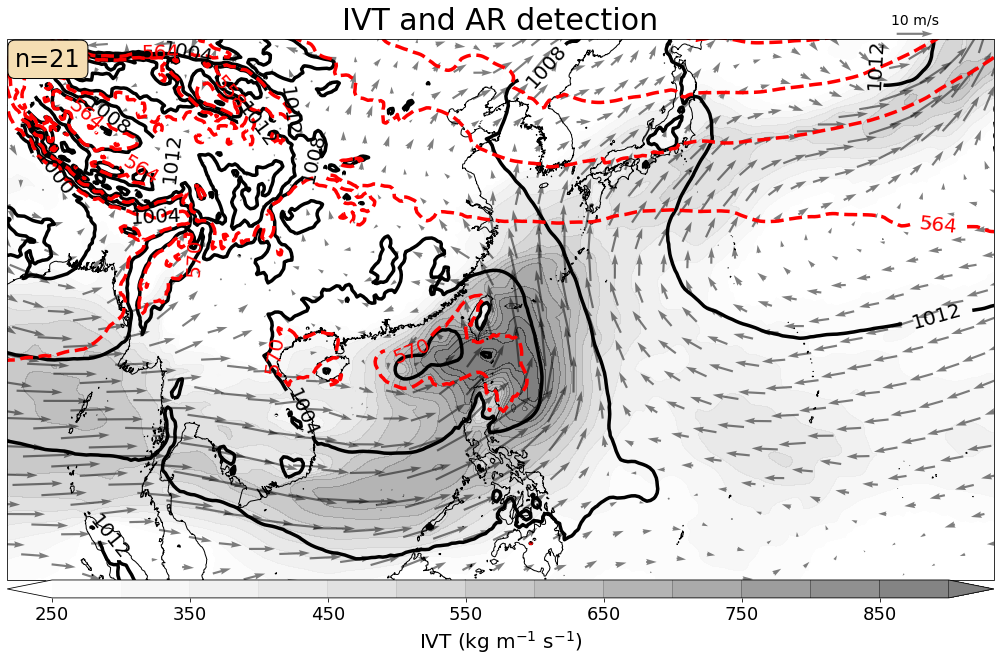

In [29]:
slp_mean=slp_mean.sel(longitude=np.arange(80,170,0.25),latitude=np.arange(0,50,0.25))
u_mean=u_mean.sel(longitude=np.arange(80,170,0.25),latitude=np.arange(0,50,0.25))
v_mean=v_mean.sel(longitude=np.arange(80,170,0.25),latitude=np.arange(0,50,0.25))
ivt_mag_mean=ivt_mag_mean.sel(longitude=np.arange(80,170,0.25),latitude=np.arange(0,50,0.25))

ivt_250=ivt_mag_mean.where(ivt_mag_mean>=250)
import matplotlib as mpl
month_dict={'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'}    
mapcrs = ccrs.LambertConformal(
    central_longitude=122, central_latitude=23.5)
count_fig=0
count_file=0
if 1==1:
    if 1==1:
        
        if 1==1:
            fig = plt.figure(1, figsize=(14, 12))
            ax = plt.subplot(111, projection=mapcrs)
            ax.set_extent([90, 155, 5, 40], ccrs.PlateCarree())
        
        if 1==1:             
            ax.coastlines(resolution='10m')
            #ax.add_feature(cfeature.STATES.with_scale('10m'),alpha=0.3)
            #ax.add_feature(cfeature.LAKES.with_scale('50m'))
            countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_boundary_lines_land',scale='50m',facecolor='none')
            ax.add_feature(countries)
            
            if 1==0:
                # *must* call draw in order to get the axis boundary used to add ticks:
                fig.canvas.draw()

                # Define gridline locations and draw the lines using cartopy's built-in gridliner:
                xticks = [-135,-125,-115,-105,-95,-85,-75,-65,-55,-45,-35,-25]
                yticks = [5,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
                ax.gridlines(xlocs=xticks, ylocs=yticks,alpha=0.5)
                ax.tick_params(labelsize=24)
                # Label the end-points of the gridlines using the custom tick makers:
                ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
                ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
                lambert_xticks(ax, xticks)
                lambert_yticks(ax, yticks)

            cax1=ax.contourf(ivt_mag_mean.longitude,ivt_mag_mean.latitude,ivt_mag_mean.where(ivt_mag_mean>=250),levels=np.arange(250,940,50),extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.Greys,alpha=0.5)
            
            cbar = plt.colorbar(cax1, orientation='horizontal', pad=0, aspect=50,fraction=0.046)
            cbar.set_label('IVT (kg m$^{-1}$ s$^{-1}$)',fontsize=20,labelpad=5)
            cbar.ax.tick_params(labelsize=18)

            c=ax.contour(slp_mean.longitude,slp_mean.latitude,slp_mean/100.,linewidths=3.5,transform=ccrs.PlateCarree(),colors='k',levels=np.arange(960,1040,4))
            X=8
            q=ax.quiver(u_mean.longitude[0::X].values,u_mean.latitude[0::X].values,u_mean[0::X,0::X].values,v_mean[0::X,0::X].values,transform=ccrs.PlateCarree(),units='inches',scale=20,width=0.03,alpha=0.5)
            ax.quiverkey(q,0.92,1.01,10,'10 m/s',fontproperties={'size':14})

            #cax21=ax.contourf(ivt_mean.longitude,ivt_mean.latitude,ivt_250.where(ar_mean>=0.5),levels=np.arange(250,1040,50),extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.Greys,alpha=0.5,label='Identified AR')
            cax2=ax.contourf(ar_mean.longitude,ar_mean.latitude,ar_mean,[0,1],colors='b',transform=ccrs.PlateCarree(),hatches=[None,'.'],alpha=0.3,label='Identified AR',zorder=20)

            c1=ax.contour(thickness_mean.longitude,thickness_mean.latitude,thickness_mean/100.,linewidths=3.5,linestyles='--',transform=ccrs.PlateCarree(),colors=['b','b','b','b','b','r','r','r','r','r','r'],levels=np.arange(516,580,6))
            plt.clabel(c,fmt='%.00f',fontsize=20)
            plt.clabel(c1,fmt='%.00f',fontsize=20)

            mpl.rcParams['hatch.linewidth']=0.01
            #plt.title('ERA5 850-hPa winds (m/s), MSLP (hPa), and IVT (kg m$^{-1}$ s$^{-1}$)',loc='left',fontsize=15)
            
            plt.title('IVT and AR detection',fontsize=30,pad=10)
            #ax.text(107,45.75,'IVT and AR detection',transform=ccrs.PlateCarree(),fontsize=30)
            props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
            ax.text(0.008, 0.985,'n='+str(len(dates_choose)), transform=ax.transAxes, fontsize=24,verticalalignment='top', bbox=props,zorder=30)


            plt.tight_layout()
            plt.show()

In [30]:
fig.savefig(dir+'taiwan_wtype_composite_201.png')